#1. Considere la función
$$f(x)\begin{cases}
|x| \ &\text{si } -1 \leq x \leq 1 \\
\ 0 \ &\text{en otro caso }
\end{cases}$$


In [1]:
#Importamos las librerías a ocupar
import random as rnd
import numpy as np
import matplotlib.pyplot as plt

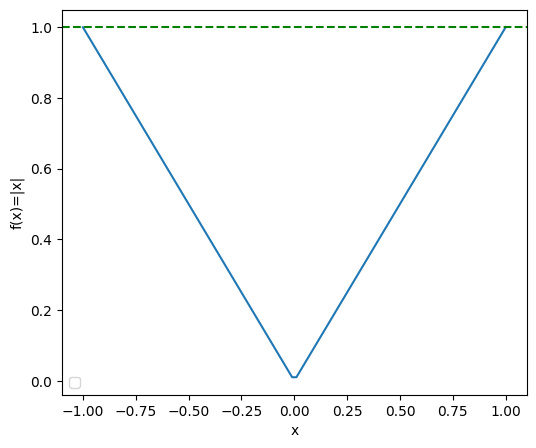

In [5]:
x=np.linspace(-1,1,100) #rango en x de [-1,1]
y=abs(x) #función f(x)
plt.figure(figsize=(6,5)) #Crear figura
plt.plot(x,y) #Grafica función |x|
plt.axhline(y=1, color='g', linestyle='--') #Máximo de la función f(x)
plt.xlabel('x')
plt.ylabel('f(x)=|x|')
#Mostrar
plt.legend() #Leyendas
plt.show() #Gráfica

##a)Dé la transformada inversa

In [34]:
def F_inversa(n): #Esta función devuelve una lista con valores de x de la función inversa
  lista1=[]
  for i in range(n):
    u=rnd.uniform(0,1) #Genera un número aleatorio entre 0 y 1
    if 0<u<1/2: #intervalo de (0,1/2)
      x=-np.sqrt(1-2*u)
      lista1.append(x)
    else: #intervalo de (1/2,1)
      x=np.sqrt(2*u-1)
      lista1.append(x)
  return lista1

In [35]:
A=F_inversa(10000) #Genera 10000 valores de x de la función inversa

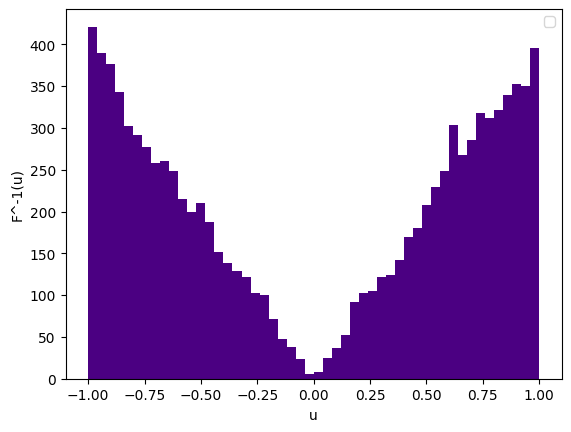

In [36]:
plt.hist(A,bins=50,color="indigo") #Histograma de G el cual tiene que tener una forma similar
            # a la función de densidad
plt.xlabel('u')
plt.ylabel('F^-1(u)')

plt.legend()
plt.show()

##b) Aceptación y rechazo

In [37]:
def f(x) : #Devuelve el valor de f(x) para cada valor de x
 return abs(x)

In [39]:
def g(x) : #Devuelve una lista de 1/2 de tamaño x
 return np.full(x,1/2)

In [76]:
def AceptyRechazo(n): #Esta función devuelve muestras generadas
 lista2=[]      #por el método de aceptación y rechazo
 for i in range(n):
  X=rnd.uniform(-1,1) #Generar un número aleatorio entre -1 y 1
  U=rnd.uniform(0,1) #Generar un número aleatorio entre 0 y 1
  if U<f(X): #Aceptación U<f(X)/c*g(x) y en caso contrario Rechazo
   lista2.append(X)
 return lista2

In [78]:
B=AceptyRechazo(10000)
G=g(10000) #Distribución uniforme

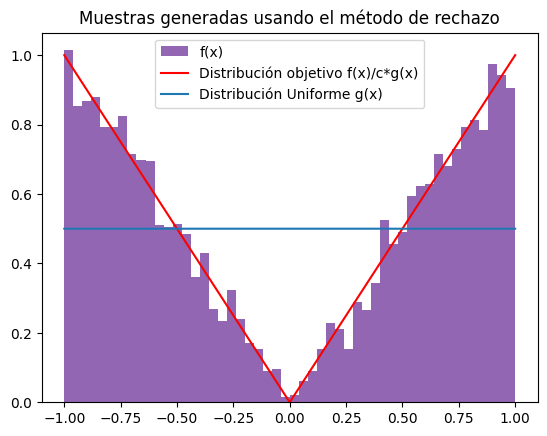

In [79]:
x = np.linspace(-1, 1, 10000) #Rango del eje de las x, del mismo tamaño que
                             #devuelve la función AceptyRechazo y g(x)
plt.hist(B, bins=50, density=True, alpha=0.6, color='indigo', label='f(x)')
plt.plot(x, f(x), 'r', label='Distribución objetivo f(x)/c*g(x)')

plt.plot(x, G, label='Distribución Uniforme g(x)') #Grafica de g(x)

plt.legend()
plt.title('Muestras generadas usando el método de rechazo')
plt.show()

##c)Método de composición

In [80]:
def F_u(n) : #Devuelve una lista con los valores de la función inversa
 lista3=[]
 for i in range(n):
  u_1=rnd.random()#Generar dos números aleatorios U(0,1)
  u_2=rnd.random() #variable a trabajar en la condiciones:
  if u_1<=1/2: #intervalo de valores menores que 1/2
   x=-np.sqrt(1-u_2)
   lista3.append(x)
  else: #intervalo de valores mayor o igual a 1/2
   x=np.sqrt(u_2)
   lista3.append(x)
 return lista3

In [81]:
C=F_u(10000) #Manda a llamar la función con n=10000

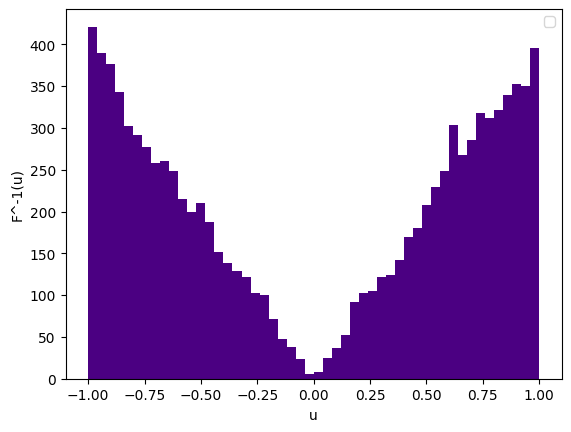

In [82]:
plt.hist(A,bins=50,color="indigo") #Histograma de G el cual tiene que tener una forma similar
            # a la función de densidad
plt.xlabel('u')
plt.ylabel('F^-1(u)')

plt.legend()
plt.show()

#2 Considere los dos generadores congruenciales siguientes:
1. $x_{i+1}=(5x_i+7) mod (128)$ con $x_0=10$
2. $x_{i+1}=(15x_i+9) mod (128)$ con $x_0=10$
Y realice lo siguiente
##a)Elija el mejor generador. Justifique su respuesta


In [200]:
def Generador_Congruencial(x_n,a,c,m):
  print("{:<8} {:<10} {:<10} {:<8} {:<15}".format("n", "x_n", "ax_n+c", "ax_n+c % m", "x_n/m"))#Encabezado de la tabla
  x_i=[] #Lista de valores de x_n
  for n in range(0,m):
   x_i.append(x_n)
   P=(a*x_n) + c #Función
   M=P%m #módulo entre producto y m
   N=x_n/m #como los números son mayores a 1 y trabajamos con valores uniformemente distribuimos
          #dividimos la semilla entre un número conveniente, siendo este m
   N=round(N,4) #redondeamos decimales
   d=[[n, x_n, P, M, N]] #datos de la tabala
   print("{:<8} {:<10} {:<10} {:<8} {:<15}".format(n, x_n, P, M, N))
   x_n=M #nueva semilla y se reinicia el método hasta m datos
  return x_i

In [201]:
G1=Generador_Congruencial(10,5,7,128) #Generador 1

n        x_n        ax_n+c     ax_n+c % m x_n/m          
0        10         57         57       0.0781         
1        57         292        36       0.4453         
2        36         187        59       0.2812         
3        59         302        46       0.4609         
4        46         237        109      0.3594         
5        109        552        40       0.8516         
6        40         207        79       0.3125         
7        79         402        18       0.6172         
8        18         97         97       0.1406         
9        97         492        108      0.7578         
10       108        547        35       0.8438         
11       35         182        54       0.2734         
12       54         277        21       0.4219         
13       21         112        112      0.1641         
14       112        567        55       0.875          
15       55         282        26       0.4297         
16       26         137        9        0.2031

In [202]:
G2=Generador_Congruencial(10,15,9,128) #Generador 2

n        x_n        ax_n+c     ax_n+c % m x_n/m          
0        10         159        31       0.0781         
1        31         474        90       0.2422         
2        90         1359       79       0.7031         
3        79         1194       42       0.6172         
4        42         639        127      0.3281         
5        127        1914       122      0.9922         
6        122        1839       47       0.9531         
7        47         714        74       0.3672         
8        74         1119       95       0.5781         
9        95         1434       26       0.7422         
10       26         399        15       0.2031         
11       15         234        106      0.1172         
12       106        1599       63       0.8281         
13       63         954        58       0.4922         
14       58         879        111      0.4531         
15       111        1674       10       0.8672         
16       10         159        31       0.0781

In [204]:
def Comprobar_ciclo(L,x_0): #Esta función recorre la lista de números generados (x_n)
  M=0 #para llevar la cuenta de las apariciones de la semilla x_0
  for i, item in enumerate(L):
    if item==x_0:
      M+=1
      if M==2: #cuenta la aparición en 0 y en la posición i
        return i # Devolver la posición de la segunda aparición
  return None  # Si no se encontró la segunda aparición, devolver None

In [205]:
H=Comprobar_ciclo(G1,10) #Comprueba el ciclo del generador 1
I=Comprobar_ciclo(G2,10) #Comprueba el ciclo del generador 2

In [206]:
if H==None:
  print("El mejor generador es el 1")
if I==None:
  print("El mejor generador es el 2")


El mejor generador es el 1


##b)Use el generador que eligió para producir una pequeña muestra de 6 valores de la variable $X\sim N(0,1)$
###1. Podemos generar una muestra $X_i\sim N(0,1)$, usando la aproximación
$$X_i=\frac{U_i^{0.135}-(1-U_i)^{0.135}}{0.1975}$$

In [225]:
def Aproximación(lista):
  print("{:<8} {:<10} {:<10}".format("i", "U_i", "X_i"))#Encabezado de la tabla
  valores_u=[elemento/128 for elemento in lista[1:7]] #los números generados empiezan en 1, y tomamos 6
                            #se divide en 128 (m) para tener valores ente 0 y 1
  valores_x=[] #almacena los valores x
  n=0
  for u in valores_u: #recorre la lista de números generados del generador 1
   x=((u**0.135)-(1-u)**0.135)/0.1975
   x=round(x,4)
   d=[[n, u, x]] #datos de la tabla
   valores_x.append(x)
   print("{:<8} {:<10} {:<10}".format(n, u, x)) #valores de la tabla
   n+=1 #aumenta el contador para indicar el número
  return valores_x #devuelve los valores de x

In [226]:
J=Aproximación(G1) #Genera los valores de x del generador 1

i        U_i        X_i       
0        0.4453125  -0.1366   
1        0.28125    -0.5761   
2        0.4609375  -0.0974   
3        0.359375   -0.3579   
4        0.8515625  1.0409    
5        0.3125     -0.486    


### También podemos usar el método de Box-Muller

In [285]:
import math

In [393]:
def dividir_lista(lista): #Divide la lista en 2, para hacer pares
  u1=[]
  u2=[]
  for k in range(len(lista)):
    if k%2==0: #Elementos con posición par en U_1
      u1.append(lista[k])
    else:
      u2.append(lista[k]) #Elementos con posición impar en U_2
  return u1,u2

In [394]:
def Box_Muller(lista): #Realiza el método para una lista
  X=[]
  Y=[]
  u1,u2=dividir_lista(lista) #listas de valores u
  for i in range(3):
    x = np.sqrt(-2 * math.log(u1[i])) * math.cos(2 * math.pi * u2[i]) #Calcula X
    y = np.sqrt(-2 * math.log(u1[i])) * math.sin(2 * math.pi * u2[i]) #Calcula Y
    X.append(x)  # Añadir los resultados a la lista
    Y.append(y)
  return X,Y,u1,u2 #Regresa los valores de X,Y y dos listas de la lista original
                   #con 3 datos cada uno

In [395]:
def Tabla(lista): #Da una tabla con los valores trabajados
  print("{:<5} {:<15} {:<15} {:<20} {:<8}".format("i", "U_1", "U_2", "X", " Y"))#Encabezado de la tabla
  valores_u=[elemento/128 for elemento in lista[1:7]] #divide los elementos de la lista en m=128
  for i in range(3):
    X,Y,u1,u2=Box_Muller(valores_u) #genera los valores de X y Y
    d=[[i, u1[i],u2[i], X, Y]] #datos de la tabla
    print("{:<5} {:<15} {:<15} {:<20} {:<8}".format(i, u1[i],u2[i], X[i], Y[i])) #valores de la tabla

In [396]:
P=Tabla(G1) #Muestra los valores de la tabla

i     U_1             U_2             X                     Y      
0     0.4453125       0.28125         -0.2481528951484249  1.2475488498650418
1     0.4609375       0.359375        -0.78955478996597    0.962075295218409
2     0.8515625       0.3125          -0.2169395767948636  0.5237384685136393
